In [312]:
import typing

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.typing import ArrayLike

## Zadanie 3 - Metody redukcji wariancji
Zapoznaj się z metodami redukcji wariacji w metodach Monte Carlo. W szczególności skupimy się na dwóch metodach:
- metoda odbić lustrzanych
- metoda zmiennej kontrolnej

Krok 1: Metodą Monte Carlo oblicz całkę:
$$ \int_0^1 \dfrac{4}{1+x^2} \, dx$$
(szacowanie liczby $\pi$).

Krok 2: Zastosuj jedną z metod redukcji wariancji do ponownego obliczenia zadanej całki.

Krok 3: Przedstaw analizę błędu względem ilości symulacji w formie tabeli lub wykresu.

### $\rightarrow$ ROZWIĄZANIE:

$\textbf{Metoda Monte Carlo}$ wykorzystywana jest do przybliżania wyników za pomocą losowego próbkowania i estymacji średniej z tych próbek.
$$ \bar{X} = \dfrac{1}{N} \sum_{i=1}^N X_i$$
gdzie: $X_i$ - niezależne zmienne losowe o ustalonym rozkładzie.

Jednak jednym z głównych problemów Monte Carlo jest wysoki błąd: $\dfrac{\sigma}{\sqrt{N}}$. Aby zwiększyć dokładność estymacji, stosuje się metody redukcji wariancji, które zmniejszają ten błąd.

$\textbf{Metoda odbić lustrzanych}$ (ang. antithetic variates) jest jedną z efektywnych technik redukcji wariancji. Polega ona na generowaniu par sprzężonych próbek losowych (ujemnie skorelowanych o tych samych rozkładach) $\left(X_i, X_i'\right)$, gdzie: $X_i'$ odbicie lustrzane $X_i$ względem pewnej osi. Wtedy:
$$ \bar{X} = \dfrac{1}{2N} \sum_{i=1}^N \left(X_i+ X_i'\right)$$

Dzięki tej technice, próbki są dobrze zbalansowane wokół środka i skrajnych wartości, co prowadzi do zredukowania wariancji i lepszej dokładności estymacji w porównaniu do klasycznej metody Monte Carlo.

In [313]:
def function(x: float) -> float:
    """Oblicz wartość funkcji w zadanym punkcie.

    Parameters
    ----------
    X: float
        wartość argumentu funkcji

    Returns:
    ----------
    float
        wartość funkcji w zadanym punkcie
    """
    return 4 / (1 + x**2)

In [314]:
def monte_carlo(
    a: int = 0,
    b: int = 1,
    func: typing.Callable[[float], float] = function,
    n: int = 1000,
) -> float:
    """Oszacuj wartość całki przy użyciu metody Monte Carlo.

    Parameters
    ----------
    a: int
        dolna granica przedziału całkowania (default 0)
    b: int
        górna granica przedziału całkowania (default 1)
    func: function
        funkcja podcałkowa
    n: int
        liczba generowanych próbek/symulacji (default 1000)

    Returns:
    ----------
    float
        szacunkowa wartość całki na przedziale [a,b]
    """
    U = np.random.uniform(a, b, n)
    result = (b - a) * np.mean(func(U))
    return result

In [315]:
def antithetic(
    a: int = 0,
    b: int = 1,
    func: typing.Callable[[float], float] = function,
    n: int = 1000,
) -> float:
    """Oszacuj wartość całki przy użyciu metody odbić lustrzanych.

    Parameters
    ----------
    a: int
        dolna granica przedziału całkowania (default 0)
    b: int
        górna granica przedziału całkowania (default 1)
    func: function
        funkcja podcałkowa
    n: int
        liczba generowanych próbek/symulacji (default 1000)

    Returns:
    ----------
    float
        wartość całki na przedziale [a,b]
    """
    U = np.random.uniform(a, b, n)
    U_prim = b - U
    result = (b - a) * (np.mean(func(U) + func(U_prim)) / 2)
    return result

In [316]:
result_monte_carlo = monte_carlo()
print("Oszacowana wartość całki przy użyciu metody Monte Carlo:", result_monte_carlo)

Oszacowana wartość całki przy użyciu metody Monte Carlo: 3.147034876411917


In [317]:
result_antithetic = antithetic()
print(
    "Oszacowana wartość całki przy użyciu metody odbić lustrzanych:", result_antithetic
)

Oszacowana wartość całki przy użyciu metody odbić lustrzanych: 3.1404652822335746


Jak możemy zauważyć powyżej, dla wystarczająco dużej liczby symulacji $n$ zarówno metoda Monte Carlo, jak i metoda odbić lustrzanych dobrze estymują wartość zadanej całki (przypomnijmy, iż podana całka reprezentuje liczbę $\pi \approx 3,141592 65$). 

Sprawdźmy zatem, jak skuteczność wspomnianych metod zależy od liczby symulacji $n$, analizując wartość błędu w zależności od liczby symulacji:

In [318]:
M0 = np.arange(10**3, 10**5, 10**3)
errors = np.zeros((2, len(M0)))
for idx, m in enumerate(M0):
    errors[0, idx] = np.abs(np.pi - monte_carlo(n=m))
    errors[1, idx] = np.abs(np.pi - antithetic(n=m))

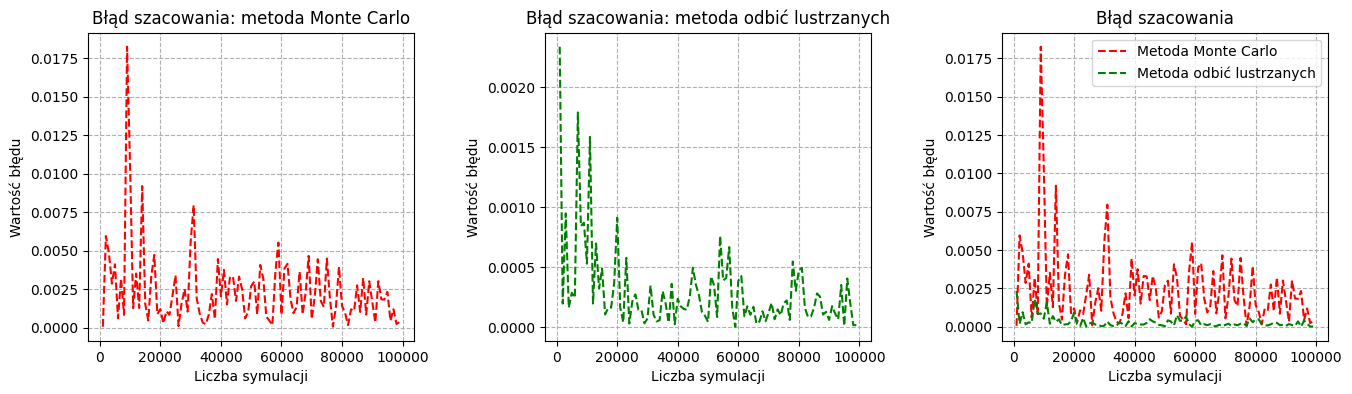

In [319]:
plt.figure(figsize=(16, 4))

# Monte Carlo
plt.subplot(1, 3, 1)
plt.plot(M0, errors[0], "r--")
plt.title("Błąd szacowania: metoda Monte Carlo")
plt.xlabel("Liczba symulacji")
plt.ylabel("Wartość błędu")
# plt.ylim(0, max(np.max(errors[0]), np.max(errors[1])) + 10 ** (-3))
plt.grid(linestyle="--")

# Metoda odbić lustrzanych
plt.subplot(1, 3, 2)
plt.plot(M0, errors[1], "g--")
plt.title("Błąd szacowania: metoda odbić lustrzanych")
plt.xlabel("Liczba symulacji")
plt.ylabel("Wartość błędu")
# plt.ylim(0, max(np.max(errors[0]), np.max(errors[1])) + 10 ** (-3))
plt.grid(linestyle="--")

# Zestawienie metod
plt.subplot(1, 3, 3)
plt.plot(M0, errors[0], "r--", label="Metoda Monte Carlo")
plt.plot(M0, errors[1], "g--", label="Metoda odbić lustrzanych")
plt.title("Błąd szacowania")
plt.xlabel("Liczba symulacji")
plt.ylabel("Wartość błędu")
# plt.ylim(0, max(np.max(errors[0]), np.max(errors[1])) + 10 ** (-3))
plt.grid(linestyle="--")
plt.legend()

plt.subplots_adjust(wspace=0.4)
plt.show()

Na powyższych wykresach możemy zauważyć, że wraz ze wzrostem liczby symulacji, dokładność otrzymywanych wyników rośnie (błąd maleje) zarówno dla metody Monte Carlo, jak i metody odbić lustrzanych. Choć spadek błędu nie jest liniowy, zauważamy, że przy większej liczbie symulacji wartości błędu stają się bardziej stabilne.

Porównując obie metody, widzimy, że metoda odbić lustrzanych generuje mniejszą wartość błędu w porównaniu do metody Monte Carlo. Oznacza to, że metoda odbić lustrzanych jest bardziej dokładna i stabilna przy tej samej liczbie symulacji.